<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/VisualizingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTS:

In [12]:
import numpy as np
import tensorflow as tf
import random
import math
from matplotlib import pyplot as plt

Creating the data:

In [13]:
x = np.array([[random.random()*100+20, random.random()*-100+20, random.random()*10-10, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()-1] for _ in range(10000)] + [[random.random()*100-120, random.random()*-100-120, random.random()*50+10, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()+1] for _ in range(10000)])
y = np.array([0 for _ in range(10000)] + [1 for _ in range(10000)])

print(x.shape)
print(y.shape)

print(x)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

(20000, 9)
(20000,)
[[ 5.49651804e+01 -1.30574117e+00 -2.97653006e+00 ...  6.98486493e-02
   3.00000000e+00 -8.42696097e-01]
 [ 4.88722700e+01 -5.38241439e+01 -6.80335076e+00 ...  3.41928194e-01
   3.00000000e+00 -7.61309861e-01]
 [ 5.47954821e+01 -7.92032789e+01 -7.99613478e+00 ...  3.17680003e-01
   3.00000000e+00 -1.90891387e-03]
 ...
 [-3.37342169e+01 -1.44892211e+02  5.56189657e+01 ...  5.83840400e-02
   3.00000000e+00  1.00908773e+00]
 [-3.46873280e+01 -1.94879748e+02  5.52224955e+01 ...  1.72575805e-01
   3.00000000e+00  1.24541388e+00]
 [-1.07807229e+02 -2.04451295e+02  3.13049728e+01 ...  3.21029277e-01
   3.00000000e+00  1.92182323e+00]]


## MODEL:

In [14]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(7, activation='sigmoid', input_shape=(x.shape[1],)),
                                    tf.keras.layers.Dense(5, activation='sigmoid'),
                                    tf.keras.layers.Dense(2, activation='sigmoid'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=50, validation_split=0.2, verbose=0)
model.evaluate(x, y)

625/625 [==============================] - 1s 1ms/step - loss: 3.8232e-06 - accuracy: 1.0000


[3.8232305996643845e-06, 1.0]

## CREATING INDIVIDUAL BASIS CLASS:

In [15]:
class NueralNetVisualizer:
  def __init__(self, X, model):
    self.X = X
    self.model = model
    self.layer_wise_output_values = None
    self.model_weights = model.get_weights()
    self.activations = None
    self.img = None
  
  def layer_wise_output(self):
    x = self.X
    output_names = [l.name for l in self.model.layers]
    self.model.outputs = [l.output for l in self.model.layers]
    self.model.build(input_shape=(x.shape[0],))
    output_values = self.model(np.array([x]))
    layer_name_to_output_value = dict(zip(output_names, output_values))
    
    self.layer_wise_output_values = [x]
    for key, item in layer_name_to_output_value.items():
      self.layer_wise_output_values.append(np.array(item[0]))

  def scoring_neurons_layerwise(self, layer_index):
    input = self.layer_wise_output_values[layer_index]
    weight = self.model_weights[layer_index*2]
    bias = self.model_weights[layer_index*2+1]
    output = self.layer_wise_output_values[layer_index+1]
    importance = []
    for index in range(weight.shape[1]):
      strengths = np.abs(input * weight.T[index] - bias[index])
      strengths = strengths
      strengths = strengths/np.sum(strengths)
      importance.append(strengths)
    importance = np.array(importance)
    neuron_scores = np.mean(importance, axis=0)
    return neuron_scores
  
  def image_initializer(self):
    layers_len = len(self.layer_wise_output_values)
    max_neurons = max([layer.shape[0] for layer in self.layer_wise_output_values])
    return np.full((layers_len, max_neurons), -1.0)
    
  def add_to_image(self, neuron_scores, layer_index):
    right = (self.img.shape[1] - neuron_scores.shape[0])//2
    left = self.img.shape[1] - right -  neuron_scores.shape[0]
    img_row = np.array([-1.0 for _ in range(right)] + [val for val in neuron_scores] + [-1.0 for _ in range(left)])
    self.img[layer_index] = img_row    

  def draw_image(self):
    fig, ax = plt.subplots()
    cmap = plt.cm.viridis
    cmap.set_under(color='black')  
    ax.imshow(self.img, vmin=-0.01, vmax=1, cmap=cmap)
    for i in range(self.img.shape[0]):
        for j in range(self.img.shape[1]):
            ax.text(j, i, "{:.2f}".format(self.img[i,j]), ha="center", va="center")

  def iterating_through_layers(self):
    self.layer_wise_output()
    self.img = self.image_initializer()
    self.draw_image()
    for layer_index in range(len(self.model_weights)//2):
      neuron_scores = self.scoring_neurons_layerwise(layer_index)
      self.add_to_image(neuron_scores, layer_index)
      self.draw_image()
      plt.pause(0.01)
    output = self.layer_wise_output_values[layer_index+1]
    output = np.array([1 for _ in range(output.shape[0])])
    output = output/np.sum(output)
    self.add_to_image(output, layer_index+1)
    self.draw_image()
    plt.pause(0.01)
    plt.show()

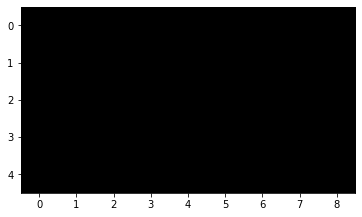

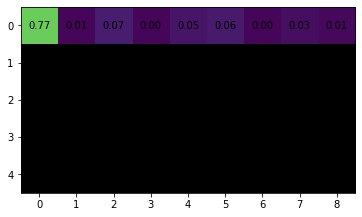

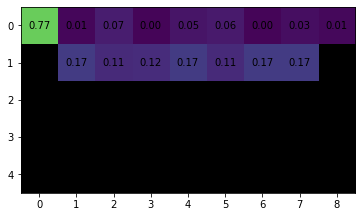

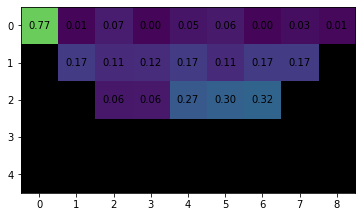

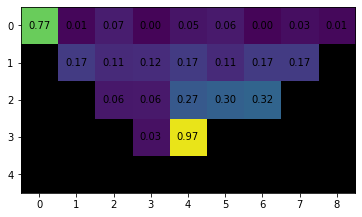

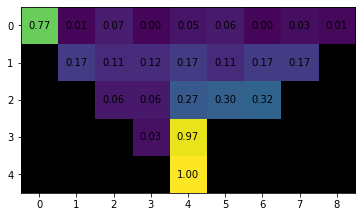

In [16]:
nnv = NueralNetVisualizer(x[1], model)
nnv.iterating_through_layers()

## LET US TAKE A LOOK AT ANOTHER EXAMPLE:

In [17]:
x = np.array([[random.random()*100+200, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()-1] for _ in range(10000)] + [[random.random()*-100-220, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()+1] for _ in range(10000)])
y = np.array([0 for _ in range(10000)] + [1 for _ in range(10000)])

print(x.shape)
print(y.shape)

print(x)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

(20000, 7)
(20000,)
[[ 2.12709823e+02  2.41601920e-01  1.00000000e+01 ...  2.59188235e-01
   3.00000000e+00 -1.88582539e-01]
 [ 2.39942813e+02  8.82274492e-02  1.00000000e+01 ...  3.58323140e-01
   3.00000000e+00 -7.98920241e-01]
 [ 2.07212425e+02  4.21596250e-02  1.00000000e+01 ...  3.09043518e-01
   3.00000000e+00 -8.30007450e-01]
 ...
 [-3.13725595e+02  2.60794635e-01  1.00000000e+01 ...  2.88430389e-01
   3.00000000e+00  1.08607780e+00]
 [-3.11646438e+02  1.55823962e-01  1.00000000e+01 ...  5.43057910e-01
   3.00000000e+00  1.82760398e+00]
 [-2.31662650e+02  7.94109666e-01  1.00000000e+01 ...  3.32529730e-01
   3.00000000e+00  1.75871884e+00]]


In [18]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(x.shape[1],)),
                                    tf.keras.layers.Dense(3, activation='sigmoid'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=100, validation_split=0.2, verbose=0)
model.evaluate(x, y)

625/625 [==============================] - 1s 1ms/step - loss: 1.7307e-08 - accuracy: 1.0000


[1.7307117516907056e-08, 1.0]

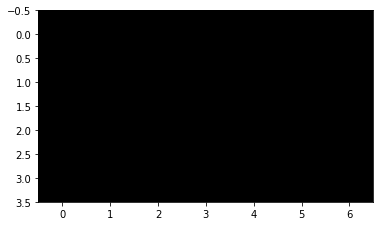

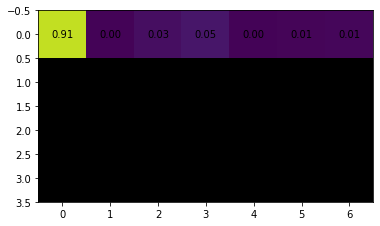

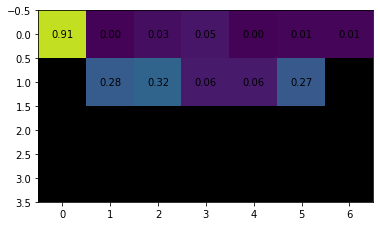

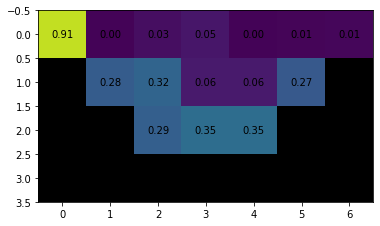

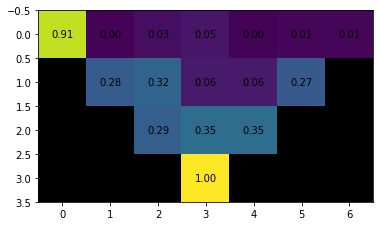

In [19]:
nnv = NueralNetVisualizer(x[0], model)
nnv.iterating_through_layers()